## Задание - часть теоретическая

- Опишите, как работает готовая модель линейной регрессии. Со своими прекрасными рисунками, примерами. Не обязательно с математикой.
- Нарисуйте и прикрепите схему перемножения матриц.
- Расскажите, как на основе регрессора построить классификатор. 
- Расскажите, как происходит обучение модели линейной регрессии. Какую роль играет функция ошибки в обучении. При чем тут градиентный спуск.
- Откройте документацию регрессора / классификатора, которые Вы использовали в практической части. Опишите их параметры, атрибуты, методы.

##### 1. Регрессия.
Регрессия - это функция зависимости одних данных от других. Линейная регрессия находит линейное отношение между переменными. Для этого используется обучение: на основе входных параметров и ответа на них модель строит зависимость между ними и запоминает их. Далее модель работает в режиме предсказания, на основе уже построенных зависимостей определяет результат на новых входных данных.


##### 2. Схема перемножения матриц

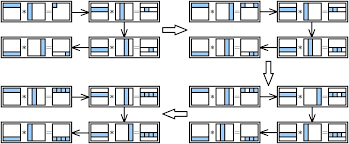

In [1]:
from IPython.display import Image
Image(filename = "img1.png", width=500, height=500)

##### 3. Классификатор на основе регрессора.
Классификатор работает как линейная регрессия, определяя выходные значения так, чтобы функция потерь была минимальной. На выходе классификатор дает оценку: к какому классу объетов принадлежит объект.


##### 4. Обучение модели линейной регрессии.
Линейная регрессия - это контролируемый метод машинного обучения, который находит линейное уравнение, лучше всего описывающее корреляцию зависимых переменных с независимыми. Это достигается путем вписывания линии в данные с помощью метода наименьших квадратов. Линия старается минимизировать сумму квадратов невязок. Невязка представляет собой расстояние между линией и текущим значением независимой переменной. Поиск наиболее подходящей линии - это итеративный процесс.

Градиентный спуск — это алгоритм оптимизации, используемый для минимизации ошибок в модели машинного обучения. Он работает путем итеративной корректировки параметров модели в направлении отрицательного градиента функции потерь (которая представляет ошибку), чтобы уменьшить ошибку и найти оптимальные параметры, которые дают наилучшие результаты прогнозирования. Алгоритм продолжает этот процесс до тех пор, пока он не достигнет минимума или не будет выполнен заранее определенный критерий остановки.


##### 5. Классификатор SGDClassifier.

Параметры:
- loss{‘hinge’, ‘log_loss’, ‘log’, ‘modified_huber’, ‘squared_hinge’, ‘perceptron’, ‘squared_error’, ‘huber’, ‘epsilon_insensitive’, ‘squared_epsilon_insensitive’}, default=’hinge’ - функция потерь
- penalty{‘l2’, ‘l1’, ‘elasticnet’, None}, default=’l2’ - термин регуляризации. По умолчанию используется «l2», который является стандартным регуляризатором для линейных моделей SVM. «l1» и «elasticnet» могут внести в модель разреженность (выбор функций), недостижимую с «l2».
- alphafloat, default=0.0001 - константа, умножающая член регуляризации. Чем выше значение, тем сильнее регуляризация. Также используется для вычисления скорости обучения, когда Learning_rate установлен на «оптимальный».
- l1_ratiofloat, default=0.15 - параметр смешивания Elastic Net
- fit_interceptbool, default=True - Должен ли перехват оцениваться или нет. Если False, предполагается, что данные уже центрированы.

Атрибуты:
- coef_ndarray of shape (1, n_features) if n_classes == 2 else (n_classes, n_features) - веса характеристик
- intercept_ndarray of shape (1,) if n_classes == 2 else (n_classes,) - константы функции решений
- n_iter_int - число итераций до критерия остановки
- loss_function_concrete LossFunction
  classes_array of shape (n_classes,)
  t_int - число обновлений весовых значений в фазе обучения



## Часть 3

- Постройте графики (в ноутбуке), которые, как вам кажется, помогли бы определить качество выделенных Вами признаков - насколько они могут быть полезны для обучения (графики строим средствами Python - например, при помощи модуля matplotlib). Предоставьте в ноутбуке свои рассуждения о полезности той или иной фичи по графикам.
- Обучите несколько классификаторов: с 5, 10, 15, 20 выделенными Вами признаками. Объясните логику выбора признаков для обучения (в ноутбуке). Используйте специальные модули для обучения, например scikit-learn, заново изобретать ничего не надо. 
- Оцените полученные модели при помощи метрики качества Accuracy. Постройте в ноутбуке график, сравнивающий модели по этой метрике. Подумайте и опишите, в чем хороша или плоха Accuracy, когда ее стоит использовать, а когда нет. Приведите в ноутбуке формулу Accuracy и расшифруйте ее.

#### Выбранные 3 интереса:
1. Разработка на С/С++ (Программирование)
2. Кинематограф
3. Изучение немецкого языка


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import random

dataset = pd.read_csv('vk_dataset.csv')

In [3]:
def pred_interest(y_pred):
    result = []
    for y in y_pred:
        result.append(1 if y == 0 else (2 if y == 1 else 3))
    return result

In [4]:
'''Обучение на всех признаках'''

X = dataset
y = dataset['Interest'].astype(int).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
X_train_values = X_train.drop(columns=[]).fillna(-1).values
X_test_values = X_test.drop(columns=[]).fillna(-1).values

print (X_train_values.shape, len(y_train))

(160, 20) 160


In [5]:
scaler = StandardScaler().fit(X_train_values)
X_train_values = scaler.transform(X_train_values)

X_test_values = scaler.transform(X_test_values)

clf = SGDClassifier(loss='modified_huber', penalty='l1')
clf.fit(X_train_values, y_train)
y_pred = clf.predict(X_test_values)

accuracy_score(y_test, y_pred)

0.975609756097561

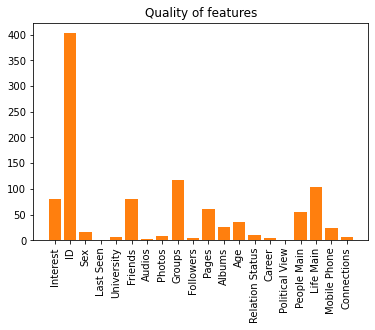

In [9]:
importance = np.abs(clf.coef_[1])
feature_names = np.array(X_train.drop(columns=[]).columns)
plt.bar(height=importance, x=feature_names)
plt.bar(height=importance[:26], x=feature_names[:26])
plt.xticks(rotation=90)
plt.title("Quality of features")
plt.show()

Мы построили график качества признаков. Для обучения модели ключевым фактором определения интересов будет являться количество подписчиков пользователя. Так же на определение одного из интересов (`программирование на c++`, `кинематограф`, `немецкий язык`) будет влиять количество подписок пользователя на группы и количество подписчиков самого пользователя, количество друзей и определение жизненных целей.

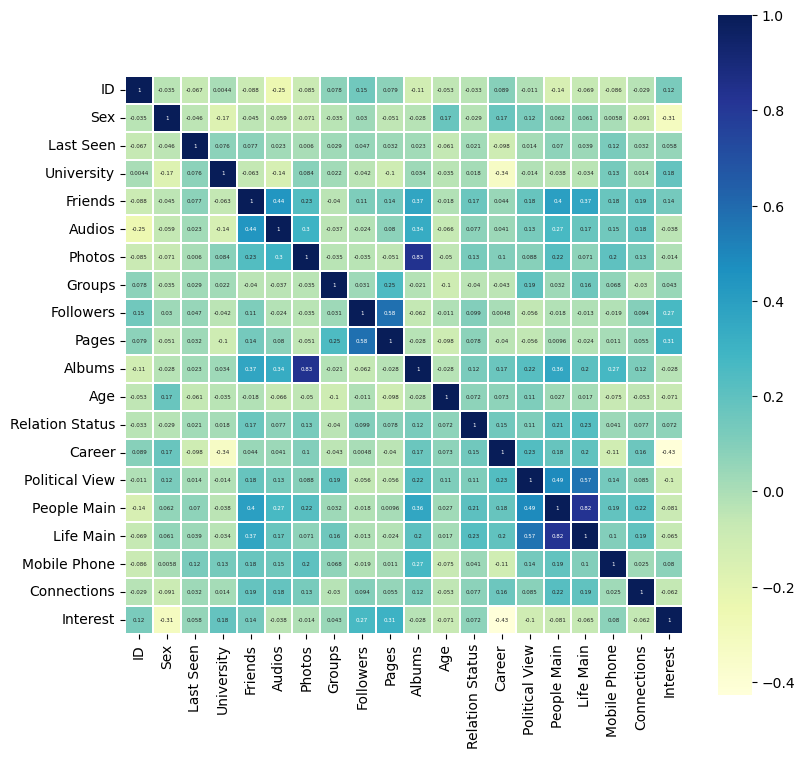

In [10]:
num = dataset.select_dtypes(include=np.number)
cols = num.columns[1:20].to_list()
cols.append('Interest')
plt.figure(figsize=(9,9), dpi=100)
corr_m = dataset[cols].corr()

sns.heatmap(corr_m, vmin=corr_m.values.min(), vmax=1, 
            square=True, cmap="YlGnBu", linewidths=0.1, annot=True, annot_kws={"fontsize":4})
plt.show()

In [11]:
corr_m['Interest'].sort_values()

Career            -0.426576
Sex               -0.310924
Political View    -0.104562
People Main       -0.081332
Age               -0.071280
Life Main         -0.065475
Connections       -0.062113
Audios            -0.038453
Albums            -0.028280
Photos            -0.014090
Groups             0.042509
Last Seen          0.058002
Relation Status    0.071522
Mobile Phone       0.080370
ID                 0.120672
Friends            0.141129
University         0.183620
Followers          0.266254
Pages              0.307390
Interest           1.000000
Name: Interest, dtype: float64

Исходя из корреляционной выборки по интересам, можно утверждать, что:
- Информацию о месте работе склонны указывать в своем профиле cpp-программисты. 
- Мужчины чаще интересуются программированием, чем женщины, а женщины - изучением немецкого языка
- Информацию о своих политических взглядах и мировоззрении чаще указывают программисты
- Изучающие немецкий язык чаще оставляют информацию о месте учебы
- Изучающие немецкий имеют больше подписчиков, чем программисты, и подписаны на большее число сообществ
- Любители кинематографа выкладывают большее количество фотографий и склонны к распределению фотографий по альбомам

## Определим выборку признаков для обучения (5, 10, 15, 20 признаков) 

In [12]:
corr_m['Interest'].apply(lambda x: abs(x)).sort_values()

Photos             0.014090
Albums             0.028280
Audios             0.038453
Groups             0.042509
Last Seen          0.058002
Connections        0.062113
Life Main          0.065475
Age                0.071280
Relation Status    0.071522
Mobile Phone       0.080370
People Main        0.081332
Political View     0.104562
ID                 0.120672
Friends            0.141129
University         0.183620
Followers          0.266254
Pages              0.307390
Sex                0.310924
Career             0.426576
Interest           1.000000
Name: Interest, dtype: float64

In [13]:
ft5 = corr_m['Interest'].apply(lambda x: abs(x)).sort_values()[-6:-1].index.to_list()
ft5

['University', 'Followers', 'Pages', 'Sex', 'Career']

In [14]:
ft10 = corr_m['Interest'].apply(lambda x: abs(x)).sort_values()[-11:-1].index.to_list()
ft10

['Mobile Phone',
 'People Main',
 'Political View',
 'ID',
 'Friends',
 'University',
 'Followers',
 'Pages',
 'Sex',
 'Career']

In [15]:
ft15 = corr_m['Interest'].apply(lambda x: abs(x)).sort_values()[-16:-1].index.to_list()
ft15

['Last Seen',
 'Connections',
 'Life Main',
 'Age',
 'Relation Status',
 'Mobile Phone',
 'People Main',
 'Political View',
 'ID',
 'Friends',
 'University',
 'Followers',
 'Pages',
 'Sex',
 'Career']

In [16]:
ft20 = corr_m['Interest'].apply(lambda x: abs(x)).sort_values()[-21:-1].index.to_list()
ft20

['Photos',
 'Albums',
 'Audios',
 'Groups',
 'Last Seen',
 'Connections',
 'Life Main',
 'Age',
 'Relation Status',
 'Mobile Phone',
 'People Main',
 'Political View',
 'ID',
 'Friends',
 'University',
 'Followers',
 'Pages',
 'Sex',
 'Career']

## Обучение модели

In [17]:
def learn_model(cols_to_drop, ft, y_test):
    X_train_values = X_train.drop(columns=cols_to_drop)[ft].fillna(-1).values
    X_test_values = X_test.drop(columns=cols_to_drop)[ft].fillna(-1).values

    scaler = StandardScaler().fit(X_train_values)
    X_train_values = scaler.transform(X_train_values)
    X_test_values = scaler.transform(X_test_values)
    
    clf = SGDClassifier(penalty='l1', random_state=36)
    clf.fit(X_train_values, y_train)
    
    y_pred = clf.predict(X_test_values)
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    
    X_train.drop(columns=cols_to_drop)[ft].columns.values
    importance = np.abs(clf.coef_[2])
    feature_names = np.array(X_train.drop(columns=cols_to_drop)[ft].columns.values)
    plt.bar(height=importance[:26], x=feature_names[:26])
    plt.xticks(rotation=90)
    plt.title("Quality of features")
    plt.show()

    return accuracy, clf

In [18]:
def show_results(X_test):
    results = pd.DataFrame({'ID': X_test['ID'].values,
                            'Sex': X_test['Sex'].values,
                            'y_pred': pred_interest(y_pred),
                            'y_true': pred_interest(y_test),
                           })
    print(results)

In [19]:
def quality_of_features(clf, ft, cols_to_drop):
    fig, axs = plt.subplots(1, 3)
    classes = ['c++', 'кинематограф', 'немецкий язык',]
    for i, ax in enumerate(axs.flat):
        if i == 3:
            continue
        plt.sca(ax)
        importance = np.abs(clf.coef_[i])
        feature_names = np.array(X_train.drop(columns=cols_to_drop)[ft].columns.values)
        if i % 3 == 0:
            plt.barh(width=importance, y=feature_names)
            plt.title(classes[i], fontsize=8)
            plt.yticks(fontsize=6)
        else:
            plt.barh(width=importance, y=feature_names)
            plt.title(classes[i], fontsize=8)
            plt.yticks(fontsize=0)
    plt.show()

## Обучение на пяти признаках:

0.6341463414634146


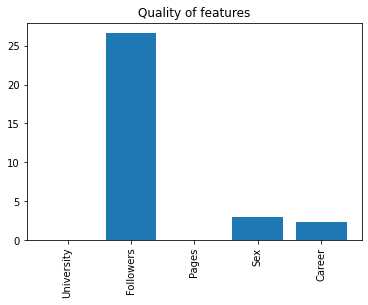

In [20]:
cols_drop = ['ID']
accuracy_5, clf = learn_model(cols_drop, ft5, y_test)

In [21]:
show_results(X_test)

           ID  Sex  y_pred  y_true
0   743969475    2       3       3
1   783546208    1       3       3
2   783188956    2       2       2
3   777472091    1       3       3
4   786370697    2       3       3
5   780706904    2       2       2
6   782641998    2       3       3
7   784548723    2       2       2
8   776822898    2       2       2
9   766152784    2       3       3
10  770873009    1       3       3
11  779121071    2       3       3
12  784184047    2       2       3
13  784092635    2       3       3
14  779533794    2       2       2
15  752553181    1       3       3
16  785381052    2       3       3
17  780043807    2       2       2
18  788295054    2       3       3
19  784134941    1       3       3
20  764916420    1       3       3
21  770690760    1       3       3
22  779680625    2       2       2
23  782739031    1       3       3
24  788384137    2       3       3
25  767812937    2       3       3
26  748462058    2       3       3
27  777476398    2  

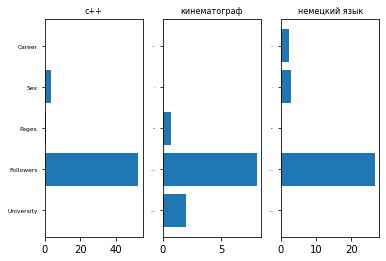

In [22]:
quality_of_features(clf, ft5, cols_drop)

## Обучение на 10 признаках

0.7073170731707317


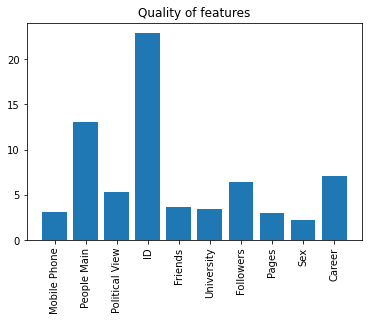

In [23]:
cols_drop = []
accuracy_10, clf = learn_model(cols_drop, ft10, y_test)

In [24]:
show_results(X_test)

           ID  Sex  y_pred  y_true
0   743969475    2       3       3
1   783546208    1       3       3
2   783188956    2       2       2
3   777472091    1       3       3
4   786370697    2       3       3
5   780706904    2       2       2
6   782641998    2       3       3
7   784548723    2       2       2
8   776822898    2       2       2
9   766152784    2       3       3
10  770873009    1       3       3
11  779121071    2       3       3
12  784184047    2       2       3
13  784092635    2       3       3
14  779533794    2       2       2
15  752553181    1       3       3
16  785381052    2       3       3
17  780043807    2       2       2
18  788295054    2       3       3
19  784134941    1       3       3
20  764916420    1       3       3
21  770690760    1       3       3
22  779680625    2       2       2
23  782739031    1       3       3
24  788384137    2       3       3
25  767812937    2       3       3
26  748462058    2       3       3
27  777476398    2  

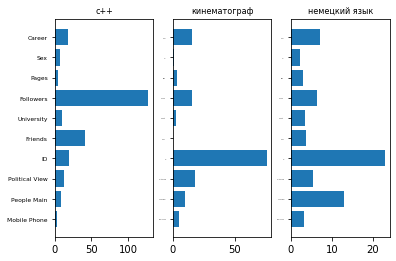

In [25]:
quality_of_features(clf, ft10, cols_drop)

## Обучение на 15 признаках

0.7560975609756098


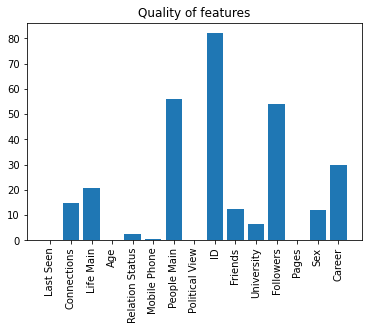

In [26]:
accuracy_15, clf = learn_model(cols_drop, ft15, y_test)

In [27]:
show_results(X_test)

           ID  Sex  y_pred  y_true
0   743969475    2       3       3
1   783546208    1       3       3
2   783188956    2       2       2
3   777472091    1       3       3
4   786370697    2       3       3
5   780706904    2       2       2
6   782641998    2       3       3
7   784548723    2       2       2
8   776822898    2       2       2
9   766152784    2       3       3
10  770873009    1       3       3
11  779121071    2       3       3
12  784184047    2       2       3
13  784092635    2       3       3
14  779533794    2       2       2
15  752553181    1       3       3
16  785381052    2       3       3
17  780043807    2       2       2
18  788295054    2       3       3
19  784134941    1       3       3
20  764916420    1       3       3
21  770690760    1       3       3
22  779680625    2       2       2
23  782739031    1       3       3
24  788384137    2       3       3
25  767812937    2       3       3
26  748462058    2       3       3
27  777476398    2  

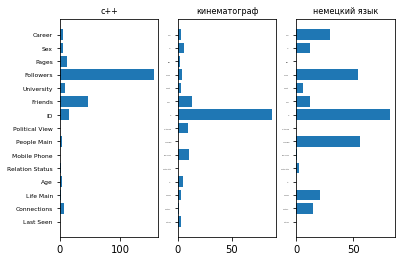

In [28]:
quality_of_features(clf, ft15, cols_drop)

## Обучение на 20 признаках

0.7073170731707317


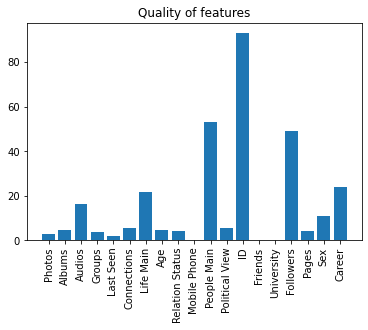

In [29]:
accuracy_20, clf = learn_model(cols_drop, ft20, y_test)

In [30]:
show_results(X_test)

           ID  Sex  y_pred  y_true
0   743969475    2       3       3
1   783546208    1       3       3
2   783188956    2       2       2
3   777472091    1       3       3
4   786370697    2       3       3
5   780706904    2       2       2
6   782641998    2       3       3
7   784548723    2       2       2
8   776822898    2       2       2
9   766152784    2       3       3
10  770873009    1       3       3
11  779121071    2       3       3
12  784184047    2       2       3
13  784092635    2       3       3
14  779533794    2       2       2
15  752553181    1       3       3
16  785381052    2       3       3
17  780043807    2       2       2
18  788295054    2       3       3
19  784134941    1       3       3
20  764916420    1       3       3
21  770690760    1       3       3
22  779680625    2       2       2
23  782739031    1       3       3
24  788384137    2       3       3
25  767812937    2       3       3
26  748462058    2       3       3
27  777476398    2  

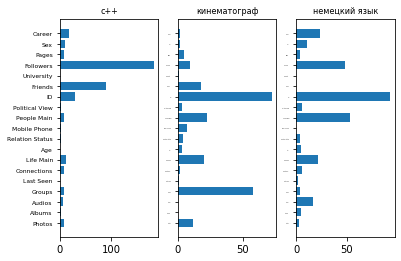

In [31]:
quality_of_features(clf, ft20, cols_drop)

## Сравнение Accuracy

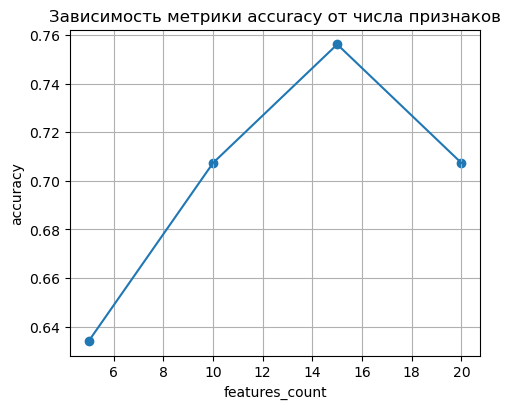

In [32]:
plt.figure(figsize=(5,4), dpi=100)
plt.plot([5, 10, 15, 20], [accuracy_5, accuracy_10, accuracy_15, accuracy_20])
plt.scatter(x=[5, 10, 15, 20], y=[accuracy_5, accuracy_10, accuracy_15, accuracy_20])
plt.grid()
plt.xlabel('features_count')
plt.ylabel('accuracy')
plt.tight_layout()
plt.title('Зависимость метрики accuracy от числа признаков')
plt.show()